# Brain Cancer MRI Images Classification

Cancer is the second leading cause of death after cardiovascular diseases. Out of all types of cancer, brain cancer has the lowest survival rate. Brain tumors can have different types depending on several factors such as the shape, texture, and location of the tumor (e.g., Acoustic Neuroma, Meningioma, Pituitary, Glioma, CNS Lymphoma . . . etc). In clinical practice, the incident rates of Glioma, Meningioma, and Pituitary tumors are approximately 45%, 15%, and 15%, respectively, among all brain tumors. Proper diagnosis of the tumor type enables the doctor to make the correct treatment choice and help save the patient’s life.


Currently, anomaly detection through MRI is manual mostly and clinicians have to spend a lot of time to detect and segment the tumor for treatment and surgical purpose. This manual technique is also prone to errors and can compromise life. Also, diversity of Tumor types, makes the detection more difficult due to the complex structure of the brain. In order to resolve these issues, studies have started to focus on various machine learning and Deep Learning techniques for computer-based tumor detection and segmentation.


 [This paper](https://www.sciencedirect.com/science/article/abs/pii/S0895611121000896?via%3Dihub) reviews different papers that tried to do the task of brain cancer MRI image classification. In this homework, we will implement and compare some of these methods.

First, import all the libraries you may need here:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!rm -rf /content/drive/MyDrive/brain_MRI_dataset_images
!rm -rf /content/drive/MyDrive/brain_MRI_dataset

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import h5py
from PIL import Image
from google.colab import drive
import os
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Input, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import Model, layers
from google.colab import drive

In [4]:
from IPython.display import clear_output 

## 1. Load Data (5 pt)

We have a dataset of 3064 T1-weighted contrast-enhanced MRI images of 3 brain tumor types (Meningiomas, Gliomas, and Pituitary tumors). You are supposed to download and unzip the [data](https://figshare.com/articles/dataset/brain_tumor_dataset/1512427/5).

We suggest loading all of the data in one folder in google drive.

In [5]:
!mkdir /content/drive/MyDrive/brain_MRI_dataset

In [6]:
!unzip /content/drive/MyDrive/1512427.zip -d /content/drive/MyDrive/brain_MRI_dataset


Archive:  /content/drive/MyDrive/1512427.zip
 extracting: /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_1-766.zip  
 extracting: /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_1533-2298.zip  
 extracting: /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_767-1532.zip  
 extracting: /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_2299-3064.zip  
 extracting: /content/drive/MyDrive/brain_MRI_dataset/cvind.mat  
 extracting: /content/drive/MyDrive/brain_MRI_dataset/README.txt  


In [7]:
!unzip /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_1-766.zip -d /content/drive/MyDrive/brain_MRI_dataset
!unzip /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_767-1532.zip -d /content/drive/MyDrive/brain_MRI_dataset
!unzip /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_1533-2298.zip -d /content/drive/MyDrive/brain_MRI_dataset
!unzip /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_2299-3064.zip -d /content/drive/MyDrive/brain_MRI_dataset
# clear_output()

Archive:  /content/drive/MyDrive/brain_MRI_dataset/brainTumorDataPublic_2299-3064.zip
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2299.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2300.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2301.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2302.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2303.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2304.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2305.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2306.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2307.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2308.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2309.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2310.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2311.mat  
  inflating: /content/drive/MyDrive/brain_MRI_dataset/2312.mat  
  in

## 2. Visualize some Images (7 pt)

In this part, we want to show 2 random MRI images from each category in the dataset. As we have 3 types of tumors, we should have 6 images in the output.

In this dataset, the images are in matlab format and each image is stored as a struct that includes tumorMask, tumorBorder, image, PID (PatientID), label. The h5py library is used to read the photos in the code section. Using this library, we read the dataset images that are in mat format.

 Images are labeled this way in .mat files:

Label 1: meningioma

Label 2: glioma

Label 3: pituitary

In [8]:
labels_dictionary = { 1: 'meningioma' , 2: 'glioma', 3:'pituitary'}

In [9]:
from matplotlib.image import imread
import random
import pandas as pd
import seaborn as sns
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transform

In [67]:
pids = []
images = []
labels = []
tumorBorders = []
tumorMasks = []
for i in range(3064) :
  data = h5py.File('/content/drive/MyDrive/brain_MRI_dataset/'+ str(i+1) +'.mat', 'r')
  # pids.append()
  pid_str=""
  for item in np.array(data['cjdata']['PID']):
    pid_str = pid_str + str(item[0]) 
  pids.append(pid_str)

  # pids[i , :] = np.reshape(np.array(data['cjdata']['PID']) , (1,6))

  # images.append(np.array(data['cjdata']['image']))
  # print(np.array(data['cjdata']['image']).shape)
  img1 = np.array(data['cjdata']['image'])
  img2 = cv2.merge((img1,img1,img1))//3
  images.append(img2)
  # print(img2.shape)
  # backtorgb = cv2.cvtColor(np.array(data['cjdata']['image']),cv2.COLOR_GRAY2RGB)
  # bachtorgb.shape


  labels.append(np.array(data['cjdata']['label'])[0][0])
  # tumorBorders.append(np.array(data['cjdata']['tumorBorder']))
  # tumorMasks.append(np.array(data['cjdata']['tumorMask']))


In [69]:
unique, counts = np.unique(pids, return_counts=True)
dict(zip(unique, counts))

{'494848515448': 18,
 '494848524954': 4,
 '494848535550': 8,
 '494848545157': 2,
 '494848565048': 17,
 '494848575048': 3,
 '494849484954': 17,
 '494849484955': 15,
 '494849485048': 18,
 '494849485057': 19,
 '494849485650': 2,
 '494849495055': 12,
 '494849495253': 12,
 '494849514853': 16,
 '494849515652': 3,
 '494849555052': 11,
 '494849555755': 15,
 '494849564849': 3,
 '494850485553': 9,
 '494850525048': 7,
 '494850525254': 4,
 '494850545256': 17,
 '494850545457': 3,
 '494850545553': 5,
 '494850554952': 13,
 '494850564956': 4,
 '494850575057': 8,
 '494850575153': 3,
 '494850575448': 5,
 '494850575653': 3,
 '494851485254': 11,
 '494851495256': 12,
 '494851505355': 18,
 '494851525556': 23,
 '494851535650': 19,
 '494851545548': 11,
 '494851545549': 15,
 '494851545551': 18,
 '494851555149': 22,
 '494851565155': 20,
 '494851575053': 15,
 '494852484957': 13,
 '494852495455': 15,
 '494852505649': 17,
 '494852535356': 24,
 '494852545652': 23,
 '494852545753': 3,
 '494852574950': 17,
 '49485349

In [70]:
df_patients = dict(zip(unique, counts))

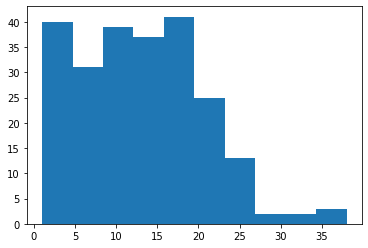

In [71]:
import matplotlib.pyplot as plt

plt.hist(counts)
plt.show()

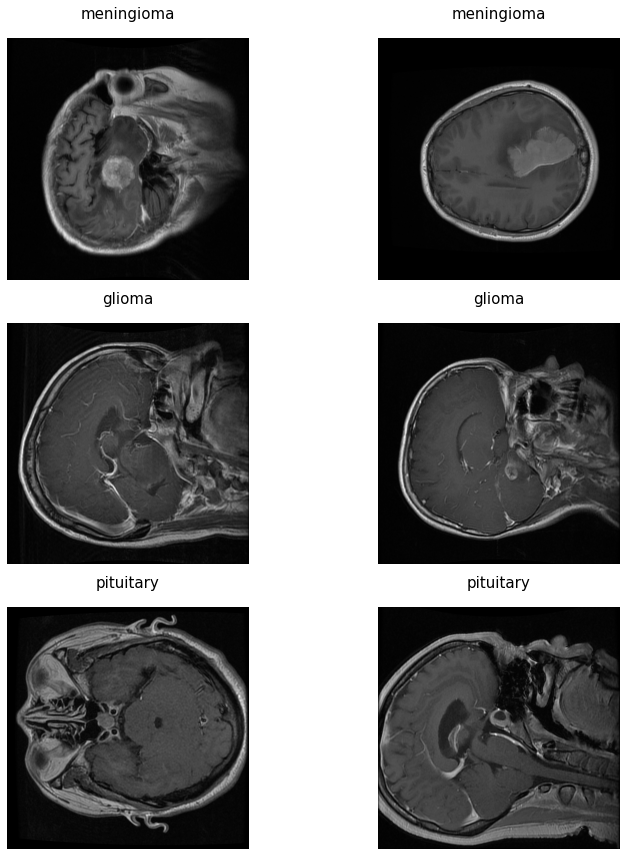

In [73]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

for i in range(3):
  for j in range(2):
    idx = random.choice([idx for idx , a  in enumerate(labels) if a == i+1])
    axs[i,j].imshow(images[idx][:,:,0] , cmap = 'gray')
    # print(images[idx].shape)
    axs[i,j].axis ('off')
    axs[i][j].set_title(labels_dictionary[i+1], fontsize=15 ,  pad=20)

plt.tight_layout()

In [74]:
!mkdir /content/drive/MyDrive/brain_MRI_dataset_images

mkdir: cannot create directory ‘/content/drive/MyDrive/brain_MRI_dataset_images’: File exists


In [75]:
!mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_1
!mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_2
!mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_3

mkdir: cannot create directory ‘/content/drive/MyDrive/brain_MRI_dataset_images/type_1’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/brain_MRI_dataset_images/type_2’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/brain_MRI_dataset_images/type_3’: File exists


In [76]:
# !mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_1/val
# !mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_2/val
# !mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_3/val

In [77]:
# !mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_1/train
# !mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_2/train
# !mkdir /content/drive/MyDrive/brain_MRI_dataset_images/type_3/train

## Split images to validation and train (10 pt)

Now, we want to save images in 3 different folders. Each folder should contain MRI images of one tumor type.

Then you should split data to train and validation. 80% of the data should be train and the rest should be validation.


In [78]:
path = '/content/drive/MyDrive/brain_MRI_dataset_images/'

In [79]:
random_indexes = np.random.permutation(len(labels))
for idx in random_indexes:
  
    if labels[idx-1] == 1 :
      cv2.imwrite(path + 'type_1/'+ str(idx)+'.png', images[idx])

    elif labels[idx-1]  ==2:
      cv2.imwrite( path + 'type_2/' +str(idx)+'.png', images[idx])

    elif labels[idx-1]  == 3:
      cv2.imwrite( path +'type_3/' +str(idx)+'.png', images[idx])

      

In [80]:
# for idx in random_indexes:
#     # if idx%iter == 0:
#       if labels[idx-1] == 1 :
#         cv2.imwrite(path + 'type_1/val/'+ str(idx)+'.png', images[idx])

#       elif labels[idx-1]  ==2:
#         cv2.imwrite( path + 'type_2/val/' +str(idx)+'.png', images[idx])

#       elif labels[idx-1]  == 3:
#         cv2.imwrite( path +'type_3/val/' +str(idx)+'.png', images[idx])
#     else:
#       if labels[idx-1]  == 1 :
#         cv2.imwrite (path + 'type_1/train/'+ str(idx)+'.png', images[idx])

#       elif labels[idx-1]  ==2:
#         cv2.imwrite( path + 'type_2/train/' +str(idx)+'.png', images[idx])

#       elif labels[idx-1]  == 3:
#         cv2.imwrite(path +'type_3/train/' +str(idx)+'.png', images[idx])
        

In [81]:
# train_samplesize = pd.DataFrame.from_dict(
#     {labels_dictionary[1]: [len([os.path.join(path+'type_1/train/', filename) 
#                      for filename in os.listdir(path+'type_1/train/')])], 
#      labels_dictionary[2]: [len([os.path.join(path+'type_2/train/', filename) 
#                         for filename in os.listdir(path+'type_2/train/')])],
#      labels_dictionary[3]: [len([os.path.join(path+'type_3/train/', filename) 
#                         for filename in os.listdir(path+'type_3/train/')])]
#      })

# sns.barplot(data=train_samplesize).set_title('Training Set Data Inbalance', fontsize=15)
# plt.show()

In [23]:
train_samplesize

,meningioma,glioma,pituitary
0,566,1141,744


In [ ]:
# val_samplesize = pd.DataFrame.from_dict(
#     {labels_dictionary[1]: [len([os.path.join(path+'type_1/val/', filename) 
#                      for filename in os.listdir(path+'type_1/val/')])], 
#      labels_dictionary[2]: [len([os.path.join(path+'type_2/val/', filename) 
#                         for filename in os.listdir(path+'type_2/val/')])],
#      labels_dictionary[3]: [len([os.path.join(path+'type_3/val/', filename) 
#                         for filename in os.listdir(path+'type_3/val/')])]
#      })

# sns.barplot(data=val_samplesize).set_title('Validatioon Set Data Inbalance', fontsize=15)
# plt.show()

In [ ]:
# val_samplesize

In [57]:
import tensorflow as tf

In [85]:
depth = 3
one_hot_labels = tf.one_hot(np.array(labels)-1, depth)

In [86]:
BS = 8
train_path = "/content/drive/MyDrive/brain_MRI_dataset_images"
train_data = image.ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # val 20%

val_data = image.ImageDataGenerator(rescale=1./255, validation_split=0.2)


traindata = train_data.flow_from_directory(train_path, 
                                               target_size=(224, 224), 
                                               color_mode='rgb',
                                               batch_size=BS, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

valdata = val_data.flow_from_directory(train_path, 
                                           target_size=(224, 224), 
                                           color_mode='rgb',
                                           batch_size=BS, 
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')

Found 2452 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


### Data Preprocessing (15 pt)

Medical images datasets are smaller in size than the datasets available in other domains due to their limitations. One way to overcome the problem of lack of sufficient amount of training data is data augmentation.

There are many type of manipulations that we can use for this target. Here are a list of some augmentation techniques that you can use in this task:

Horizontal and vertical flips

Rotation

Zooming

Shifting

Shearing

Brightness

ZCA whitening

In [87]:
#Complete your code here...

## Implementing 3 Different Classification Models

Now we want to design models for MRI image classification. Models that we want to use are these:

1- ResNet50

2- AlexNet

3- Multi-layer perceptron

### ResNet Model Design, image level (20pt)

Now it's time to create the model. Here we use Residual Network architecture composed of 50 layers for our model. Set the optimizer to 'Adam' and learning rate to '0.0003' for 200 epoches. You can change settings like LR untill getting better performance.


In this task we consentrate on the content of [this paper](https://doi.org/10.1016/j.artmed.2019.101779).

In [88]:
from tensorflow.keras import backend as K 

In [89]:
def load_model(last=True):
  K.clear_session()

  #loading Resnet50 model
  mod=ResNet50(include_top=True, weights='imagenet')
  out_1=mod.layers[-2]
  out=Dense(3,activation='softmax')(out_1.output)
  model=Model(inputs=mod.input,outputs=out)
  if last:
    for i in range(len(model.layers)):
        model.layers[i].trainable = False
  model.layers[-1].trainable=True
  return model

  
ResNet_model=load_model(last=False)

In [90]:
ResNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

### Train the ResNet50 model (10pt)

Now train the model and save accuracy, precision, recall, and f1-score every epoch.


In [91]:
from tensorflow.keras.optimizers import Adam
import time

In [92]:
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [93]:
ResNet_model.compile(optimizer=Adam(3e-4,decay=0,clipnorm=1.0),loss='categorical_crossentropy',metrics=['accuracy' , 'Precision' , 'Recall' , f1_metric])
start=time.time()
history_last=ResNet_model.fit_generator(traindata,epochs=1,validation_data=valdata,steps_per_epoch=len(traindata)//4)
end=time.time()
elapsed_time = end - start
print("Took: ", elapsed_time)

<ipython-input-93-8cc6add23914>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_last=ResNet_model.fit_generator(traindata,epochs=1,validation_data=valdata,steps_per_epoch=len(traindata)//4)


76/76 [==============================] - 99s 312ms/step - loss: 0.9629 - accuracy: 0.6414 - precision: 0.6734 - recall: 0.6036 - f1_metric: 0.6327 - val_loss: 179.7596 - val_accuracy: 0.2304 - val_precision: 0.2304 - val_recall: 0.2304 - val_f1_metric: 0.2289


In [ ]:
# pre=ResNet_model.predict(test_x)
# pre=np.argmax(pre,1)  
# end=time.time()
# times_last[fold]=end-start

# #Prediction 
# pre=model.predict(test_x)
  
# #Maximum position
# pre=np.argmax(pre,1)
# predictions_last[fold]=pre
  
# #Accuracy
# new_acc=accuracy_score(pre,test_y)

# #Saving Predictions
# final_accuracy_last[fold]=new_acc

# #Saving Answers
# answers_last[fold]=test_y
    
# #Clear Memory
# del([train,test,train_x,train_y,test_x,test_y])
# gc.collect()

###Loss and accuracy diagrams for ResNet50 (10 pt)

Now plot results for accuracy of train and validation during epoches.

In another plot show loss for train and validation during epoches.

Explain the results.

In [94]:
def plotModelHistory(pltTitle):

  fig, ax = plt.subplots(2, 3)
  
  ax[0,0].grid()
  ax[0,0].plot(history_last.history['loss'], color='b', label='loss')
  ax[0,0].plot(history_last.history['val_loss'], color='r', label='val_loss')
  legend = ax[0,0].legend(loc='best', shadow=True)

  ax[0,1].grid()
  ax[0,1].plot(history_last.history['accuracy'], color='b', label='accuracy')
  ax[0,1].plot(history_last.history['val_accuracy'], color='r', label='val_accuracy')
  legend = ax[0,1].legend(loc='best', shadow=True)



  ax[0,2].grid()
  ax[0,2].plot(history_last.history['precision'], color='b', label='precision')
  ax[0,2].plot(history_last.history['val_precision'], color='r', label='val_precision')
  legend = ax[0,2].legend(loc='best', shadow=True)


  ax[1,0].grid()
  ax[1,0].plot(history_last.history['recall'], color='b', label='recall')
  ax[1,0].plot(history_last.history['val_recall'], color='r', label='val_recall')
  legend = ax[1,1].legend(loc='best', shadow=True)

  
  ax[1,1].grid()
  ax[1,1].plot(history_last.history['f1_metric'], color='b', label='f1_metric')
  ax[1,1].plot(history_last.history['val_f1_metric'], color='r', label='val_f1_metric')
  legend = ax[1,1].legend(loc='best', shadow=True)

  plt.suptitle(pltTitle)

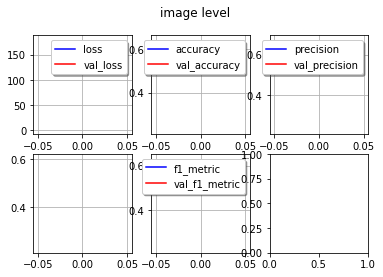

In [95]:
plotModelHistory('image level RESNET')

###ResNet Model, Patient level (30 pt)


Here we want to repeat ResNet model in a different way. You should do all the steps again with a difference in spliting the data. In patient level you should pay attention that all the images from a patient should be either in train or validation.

So, do the spliting part of data with considering this point and then do all the steps again (design the model, train the model, plot accuracy and loss diagrams).


How different are the results?

Which method do yo think is better? Which results are more reliable? Image level method or patient level method?

In [96]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [97]:
train_patients, test_patients = train_test_split(unique, train_size=0.7)
    # train_df, test_df = df_group.loc[train_customers], df_group.loc[test_customers]
train_x =[]
train_y = []
test_x = []
test_y = []
for train_index , train_id in enumerate(train_patients) :
  if train_id in train_patients:
    train_x.append( cv2.resize(images[train_index] , (224,224))) 
    train_y.append(one_hot_labels[train_index])



for test_index , test_id in enumerate(test_patients) :
  if test_id in test_patients:
    test_x.append(cv2.resize(images[test_index] ,  (224,224))) 
    test_y.append(one_hot_labels[test_index])


In [98]:
train_x = np.reshape( np.array(train_x) , ( np.array(train_x).shape[0],  224,224 , 3 ))
test_x = np.reshape( np.array(test_x) , ( np.array(test_x).shape[0] , 224,224, 3 ))

In [56]:
#  train_data.flow( np.reshape(train_x[1, : , :], (1, 1,512,512)) , train_y[1] ,batch_size = BS)

In [111]:
np.array(train_x).shape

(163, 224, 224, 3)

In [100]:
BS = 8
train_data = image.ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # val 20%

val_data = image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [104]:
ResNet_model.compile(optimizer=Adam(3e-4,decay=0,clipnorm=1.0),loss='categorical_crossentropy',metrics=['accuracy' , 'Precision' , 'Recall' , f1_metric])

start=time.time()
history_last=ResNet_model.fit( train_data.flow( train_x, np.array(train_y) ,batch_size = BS),epochs=1, validation_data =train_data.flow( test_x, np.array(test_y)) , batch_size = BS)

end=time.time()


21/21 [==============================] - 17s 318ms/step - loss: 0.3107 - accuracy: 0.9387 - precision: 0.9441 - recall: 0.9325 - f1_metric: 0.9396 - val_loss: 0.2699 - val_accuracy: 0.9857 - val_precision: 0.9857 - val_recall: 0.9857 - val_f1_metric: 0.9896


In [ ]:
plotModelHistory('patient level')

## 1. AlexNet Model Design (20 pt)

Now we want to test another model. We will use AlexNet here.

Run it for 100 epoches. You can change settings to get better performance.

set optimizer = 'Adam' and loss = 'categorical_crossentropy'.



In [105]:
AlexNet_model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='softmax')      
])

In [106]:
AlexNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

### Train the AlexNet model (10pt)

Now train the model and save accuracy, precision, recall, and f1-score every epoch.

In [107]:
#Complete your code here...
AlexNet_model.compile(optimizer=Adam(3e-4,decay=0,clipnorm=1.0),loss='categorical_crossentropy',metrics=['accuracy' , 'Precision' , 'Recall' , f1_metric])
start=time.time()
history_last=ResNet_model.fit_generator(traindata,epochs=10,validation_data=valdata,steps_per_epoch=len(traindata)//4)
end=time.time()
elapsed_time = end - start
print("Took: ", elapsed_time)

<ipython-input-107-b5164f6c4e9a>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_last=ResNet_model.fit_generator(traindata,epochs=10,validation_data=valdata,steps_per_epoch=len(traindata)//4)


Epoch 1/10
76/76 [==============================] - 21s 272ms/step - loss: 1.2899 - accuracy: 0.5987 - precision: 0.6725 - recall: 0.5066 - f1_metric: 0.5772 - val_loss: 1.8932 - val_accuracy: 0.4657 - val_precision: 0.4657 - val_recall: 0.4657 - val_f1_metric: 0.4627
Epoch 2/10
76/76 [==============================] - 21s 271ms/step - loss: 0.6690 - accuracy: 0.7268 - precision: 0.7907 - recall: 0.6507 - f1_metric: 0.7042 - val_loss: 10.0185 - val_accuracy: 0.4657 - val_precision: 0.4657 - val_recall: 0.4657 - val_f1_metric: 0.4627
Epoch 3/10
76/76 [==============================] - 19s 252ms/step - loss: 0.6308 - accuracy: 0.7336 - precision: 0.7833 - recall: 0.6776 - f1_metric: 0.7237 - val_loss: 1.7832 - val_accuracy: 0.2304 - val_precision: 0.2304 - val_recall: 0.2304 - val_f1_metric: 0.2289
Epoch 4/10
76/76 [==============================] - 20s 258ms/step - loss: 0.5634 - accuracy: 0.7681 - precision: 0.7993 - recall: 0.7336 - f1_metric: 0.7626 - val_loss: 2.5638 - val_accuracy:

###Loss and accuracy diagrams for AlexNet (10 pt)

Now plot results for accuracy of train and validation during epoches.

In another plot show loss for train and validation during epoches.

Explain the results.

In [ ]:
#Complete your code here...
plotModelHistory('image level RESNET')

##Design the Multi-Layer Perceptron model (20 pt)

We want to implement a Multi layer perceptron deep network to classify our dataset too.

Do the steps as you did in other models.

In [120]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout


In [121]:
# image_size = 224
batch_size = 32




MLP_model = Sequential()
MLP_model.add(Flatten(input_shape = train_x.shape[1:]))
MLP_model.add(Dense(1024, activation='relu'))
MLP_model.add(Dropout(0.5))
MLP_model.add(Dense(512, activation='relu'))
MLP_model.add(Dropout(0.5))

MLP_model.add(Dense(256, activation='relu'))
MLP_model.add(Dropout(0.5))

MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dropout(0.5))

MLP_model.add(Dense(64, activation='relu'))
MLP_model.add(Dropout(0.5))

MLP_model.add(Dense(32, activation='relu'))
MLP_model.add(Dropout(0.5))

MLP_model.add(Dense(16, activation='relu'))
MLP_model.add(Dropout(0.5))


MLP_model.add(Dense(3, activation='softmax'))

MLP_model.summary()
#Complete your code here...
#  = #define your model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 1024)              154141696 
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)              

###Train the model (10pt)

In [ ]:
#Complete your code here...
#Complete your code here...
MLP_model.compile(optimizer=Adam(3e-6,decay=0,clipnorm=1.0),loss='categorical_crossentropy',metrics=['accuracy' , 'Precision' , 'Recall' , f1_metric])
start=time.time()
history_last=MLP_model.fit_generator(traindata,epochs=10,validation_data=valdata,steps_per_epoch=len(traindata)//4)
end=time.time()
elapsed_time = end - start
print("Took: ", elapsed_time)

Epoch 1/10


<ipython-input-124-aaedc6d9054d>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_last=MLP_model.fit_generator(traindata,epochs=10,validation_data=valdata,steps_per_epoch=len(traindata)//4)


76/76 [==============================] - 18s 219ms/step - loss: 1.0838 - accuracy: 0.4603 - precision: 0.6667 - recall: 0.0132 - f1_metric: 0.0234 - val_loss: 1.0675 - val_accuracy: 0.4657 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_metric: 0.0000e+00
Epoch 2/10
76/76 [==============================] - 17s 222ms/step - loss: 1.0740 - accuracy: 0.4539 - precision: 0.5000 - recall: 0.0033 - f1_metric: 0.0058 - val_loss: 1.0675 - val_accuracy: 0.4657 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_metric: 0.0000e+00
Epoch 3/10
44/76 [================>.............] - ETA: 5s - loss: 1.0721 - accuracy: 0.4432 - precision: 0.6667 - recall: 0.0057 - f1_metric: 0.0101

###Loss and accuracy diagrams for multi-layer perceptron (10 pt)


In [ ]:
#Complete your code here...

def plotModelHistory(pltTitle):

  fig, ax = plt.subplots(2, 3)
  
  ax[0,0].grid()
  ax[0,0].plot(history_last.history['loss'], color='b', label='loss')
  ax[0,0].plot(history_last.history['val_loss'], color='r', label='val_loss')
  legend = ax[0,0].legend(loc='best', shadow=True)

  ax[0,1].grid()
  ax[0,1].plot(history_last.history['accuracy'], color='b', label='accuracy')
  ax[0,1].plot(history_last.history['val_accuracy'], color='r', label='val_accuracy')
  legend = ax[0,1].legend(loc='best', shadow=True)



  ax[0,2].grid()
  ax[0,2].plot(history_last.history['precision'], color='b', label='precision')
  ax[0,2].plot(history_last.history['val_precision'], color='r', label='val_precision')
  legend = ax[0,2].legend(loc='best', shadow=True)


  ax[1,0].grid()
  ax[1,0].plot(history_last.history['recall'], color='b', label='recall')
  ax[1,0].plot(history_last.history['val_recall'], color='r', label='val_recall')
  legend = ax[1,1].legend(loc='best', shadow=True)

  
  ax[1,1].grid()
  ax[1,1].plot(history_last.history['f1_metric'], color='b', label='f1_metric')
  ax[1,1].plot(history_last.history['val_f1_metric'], color='r', label='val_f1_metric')
  legend = ax[1,1].legend(loc='best', shadow=True)

  plt.suptitle(pltTitle)

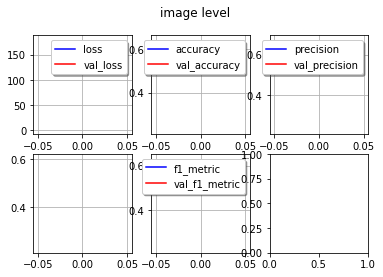

In [ ]:
plotModelHistory('image level RESNET')

####Now answer these questions:

1- How close are your answers to those in the paper?

2- Why do you think they aren't close if they aren't?

3- What suggestions do you have for improving any of these methods?

4- Compare the results from these 3 models. How would you rate each method in terms of its effectiveness?

5- Can we trust our answer for any MRI image of a patient? Answer the question in detail.